In [30]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az

In [58]:
# read all conditions and sessions data for a specifit participant
session =1
reverse =21
condition ='Act'
# Main directory of the subject
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
# The adrees name of pickle file
pickelDir = subMainDirec + 'Model_secondOrder/hier/group1/' + 'cond-' + str(condition) + '_env-' + str(reverse) + '_Stan-hierRL_simple_transfer_group1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']

In [29]:
az.summary(fit)[0:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
hier_alphaAct_mu,-2.161,0.446,-2.987,-1.350,0.011,0.008,1457.0,2903.0,1.01
hier_alphaClr_mu,-0.287,0.218,-0.723,0.084,0.018,0.014,162.0,237.0,1.04
hier_weightAct_mu,-0.050,0.387,-0.778,0.685,0.015,0.011,613.0,1224.0,1.01
hier_sensitivity_mu,-3.271,0.152,-3.551,-2.979,0.009,0.006,256.0,366.0,1.03
hier_alphaAct_sd,0.056,0.161,0.000,0.283,0.004,0.003,489.0,817.0,1.02


In [46]:
fit["transfer_weightAct"][0].shape

(60000,)

Text(0.5, 0, '$w_{(A)}$')

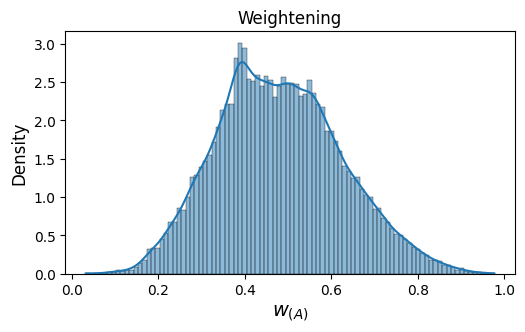

In [55]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(fit["transfer_hier_weightAct_mu"].flatten(), kde=True, stat='density')
plt.title('Weightening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)

Text(0.5, 0, '$\\alpha_{(C)}$')

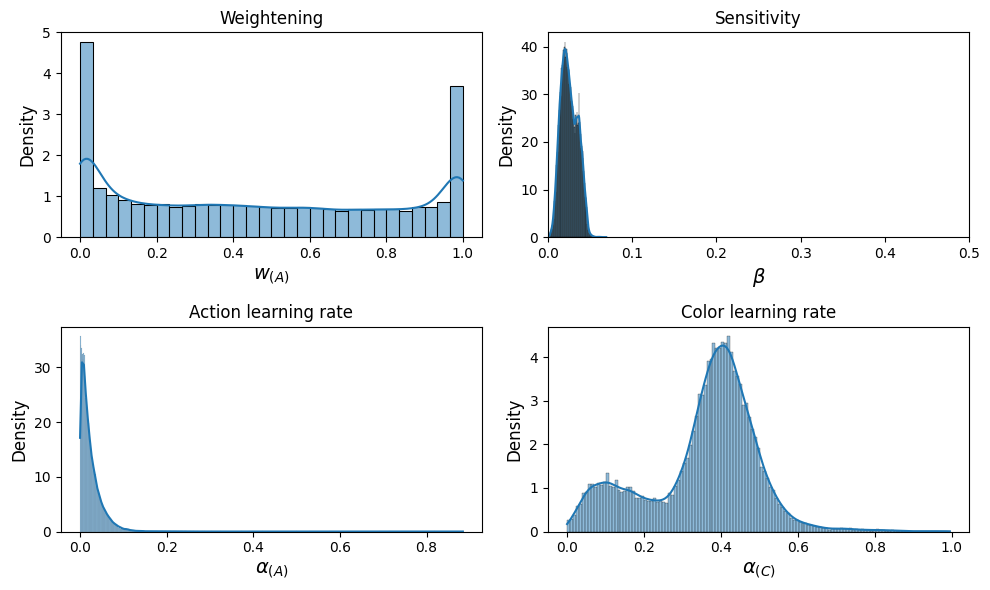

In [57]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(fit["transfer_weightAct"][0].flatten(), kde=True, stat='density')
plt.title('Weightening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)

 
# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(fit["transfer_sensitivity"][0].flatten(), kde=True, stat='density')
plt.title('Sensitivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\beta$', fontsize=14)
plt.xlim(0, .5)
    
# Action learning rate
fig.add_subplot(rows, columns, 3)
sns.histplot(fit["transfer_alphaAct"][0].flatten(), kde=True, stat='density')
plt.title('Action learning rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\alpha_{(A)}$', fontsize=14)

# Color learning rate
fig.add_subplot(rows, columns, 4)
sns.histplot(fit["transfer_alphaClr"][0].flatten(), kde=True, stat='density')
plt.title('Color learning rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\alpha_{(C)}$', fontsize=14)

# Main directory of the subject
#subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
# Save figure of parameter distribution 
#fig.savefig(subMainDirec + '/Model_secondOrder/indv/Group2/allIndv-cond-' + str(condition) + '_env-' + str(reverse) + '_StanRL_simple_normal.png', dpi=300)

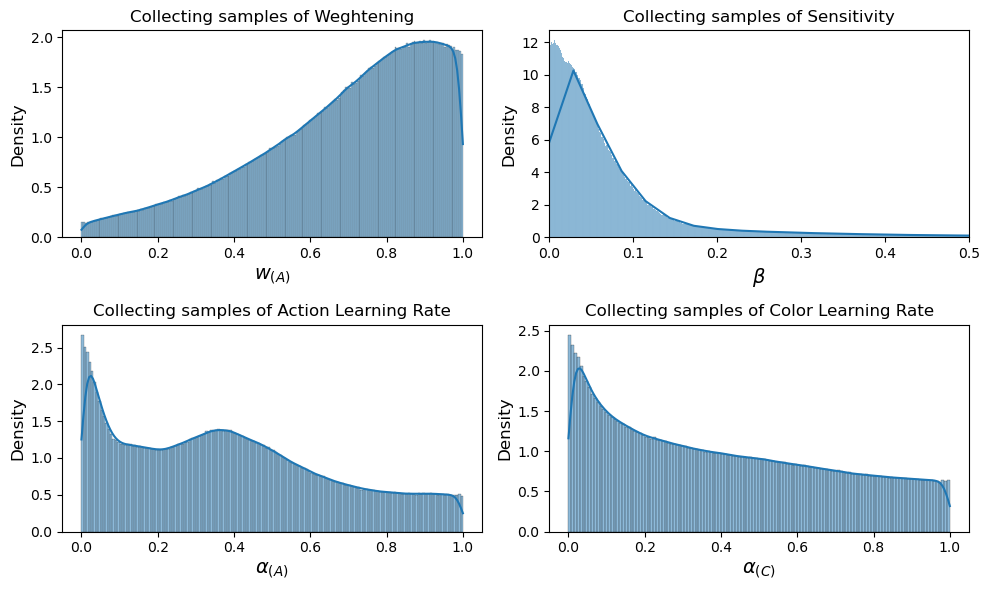

In [20]:

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Exctracting and Collecting all samples of Weghtening across participant
collectWeightAct = np.zeros(0)
for i in range(len(fit)):
    collectWeightAct = np.concatenate([collectWeightAct, fit[i]["weightAct"].flatten()])

fig.add_subplot(rows, columns, 1)
sns.histplot(collectWeightAct, kde=True, stat='density')
plt.title('Collecting samples of Weghtening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)

# Exctracting and Collecting all samples of Sensitivity across participant
collectBeta = np.zeros(0)
for i in range(len(fit)):
    collectBeta = np.concatenate([collectBeta, fit[i]["sensitivity"].flatten()])

fig.add_subplot(rows, columns, 2)
sns.histplot(collectBeta, kde=True, stat='density')
plt.title('Collecting samples of Sensitivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\beta$', fontsize=14)
plt.xlim(0, .5)

# Exctracting and Collecting all samples of Action Learning Rate across participant
collectalphaAct = np.zeros(0)
for i in range(len(fit)):
    collectalphaAct = np.concatenate([collectalphaAct, fit[i]["alphaAct"].flatten()])

fig.add_subplot(rows, columns, 3)
sns.histplot(collectalphaAct, kde=True, stat='density')
plt.title('Collecting samples of Action Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(A)} $', fontsize=14)


# Exctracting and Collecting all samples of Color Learning Rate across participant
collectalphaClr = np.zeros(0)
for i in range(len(fit)):
    collectalphaClr = np.concatenate([collectalphaClr, fit[i]["alphaClr"].flatten()])

fig.add_subplot(rows, columns, 4)
sns.histplot(collectalphaClr, kde=True, stat='density')
plt.title('Collecting samples of Color Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(C)} $', fontsize=14)

plt.subplots_adjust(wspace=10.)

# Main directory of the subject
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
# Save figure of parameter distribution 
fig.savefig(subMainDirec + '/Model_secondOrder/indv/Group2/collectSamplesIndv-cond-' + str(condition) + '_env-' + str(reverse) + '_StanRL_simple_normal.png', dpi=300)